# Simple Logistic regression

Import libraries, data, and select depndent and independent variables.

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/Heart.csv")
df['AHD'] = df['AHD'].map({'No' : 0, 'Yes' : 1})

X = df[['MaxHR']]
y = df['AHD']

In [78]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [79]:
def np_normalize(array):
    minimum = np.min(array)
    maximum = np.max(array)
    return (array - minimum) / (maximum - minimum)

X = np_normalize(X)

X.head()

,MaxHR
0,0.603053
1,0.282443
2,0.442748
3,0.885496
4,0.770992


Next visualize data: people with AHD have value 1 and people withou have value 0, the x-axis corresponds to the maximum heart rate.

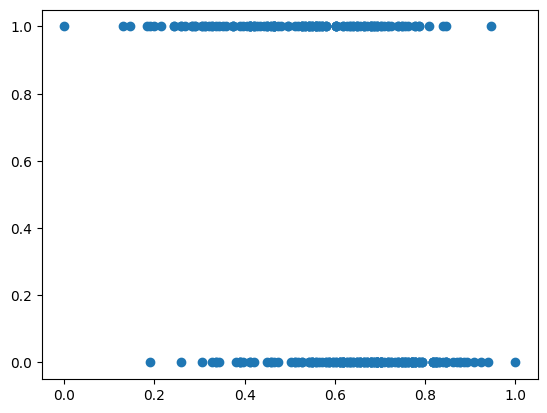

In [80]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

Now split the data into training and testing dataset and fit logistic regression from the standard model.

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


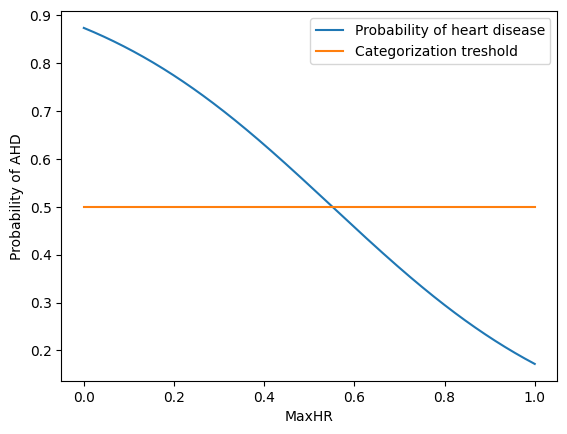

In [81]:
#Libraries
from sklearn.linear_model import LogisticRegression

# Train the model
model_sci = LogisticRegression(random_state=1).fit(X, y)

#Defining categorization treshold
# CONSTANT
bayes_treshold = 0.5

#Plot probabilities
x_lin = np.linspace(0,1,500).reshape(-1,1)
y_proba_sci = model_sci.predict_proba(x_lin)
plt.plot(x_lin, y_proba_sci[:, 1])
plt.plot(x_lin, np.array([bayes_treshold for i in range(len(y_proba_sci[:,1]))]))
plt.xlabel("MaxHR")
plt.ylabel("Probability of AHD")
plt.legend(["Probability of heart disease", "Categorization treshold"])

## Gradient descent

To find approximation of $\beta_0, \beta_1$ we resort to a technique called gradient descent. Assume a function $F(\bm x)$ that describes a hyper-surface where $\bm x$ is a point of vector space. Now, consider $\nabla F(\bm x)$, a gradient of $F(\bm x)$, it gives the direction of fastest growth of $F(\bm x)$. Hence, $-\nabla F(x)$ gives a direction of **fastest descent**.

Therefore, we can define a sequence $\{ \bm x_n \}_{n=0}^N$ such that

$$
\bm x_{n+1} = \bm x_n - \gamma \nabla F(\bm x_n),
$$

where $\gamma$ is the step size and $N$ is the maximum number of steps. 

### Estimating parameters

Ofcouse, for our purposes we consider $\bm \beta = (\beta_0, \beta_1)$ with $Loss (p | Y)$. Then consider a sequence of vectors $\{ \bm \beta_n \}_{n=0}^N$ where $N$ is a maximum number of steps and with an intial guess $\bm \beta_0$ such that

$$
\bm \beta_{n+1} = \bm \beta_n - \gamma \nabla Loss(p | Y),
$$
where $\gamma$ is a step size. In particular, note that

$$
\nabla Loss(p | Y) = \frac{1}{N_{\text{data}}}\left( \frac{d \;l(p | Y)}{d\; \beta_0}, \frac{d \;l(p | Y)}{d\; \beta_1} \right).
$$
We have

$$
\frac{d \;l(p | Y)}{d\; \beta_m} = - \sum_{i} \left( y_i(1-p_i) -  (1-y_i)p_i\right) x_{i,m} = 0
$$

where $x_{i,m} = 1$ if $m=0$ and $x_{i,m} = x_i$ otherwise and

$$
p_i = \frac{1}{1+\exp^{-(\beta_0 + \beta_1 x_i)}}.
$$

## Implementation

First step is to implement logistic regression $p_i$ and gradient of the loss function $\nabla Loss(p | Y)$.

In [82]:
def logistic(betas, X):
    X_np = np.array(X)[:,0]
    return 1 / (1+np.exp(-(betas[0]+betas[1]* X_np)))


def grad_loss(betas, X, y):
    N = len(y)
    X_np = np.array(X)[:,0]
    y_np = np.array(y)
    p_hat = logistic(betas, X)
    der_beta_0 = -np.sum(y_np * (1 - p_hat) - (1 - y_np) * p_hat)
    der_beta_1 = -np.sum((y_np * ( 1 - p_hat ) - (1 - y_np) * p_hat ) * X_np)

    return 1/N * np.array([der_beta_0, der_beta_1])

The second step is to initiate gradient descent and refining approximation of beta's in each iteration.

In [83]:
X=X[['MaxHR']]
gamma = 0.5
init_guess = [0,0]
betas = init_guess
max_iter = 100000

print(betas)
for i in range(max_iter):
    betas = betas - gamma * grad_loss(betas, X, y)
print(betas)

[0, 0]
[ 3.24276001 -5.68685713]


Lastly let's plot logistic regression for final parameters 

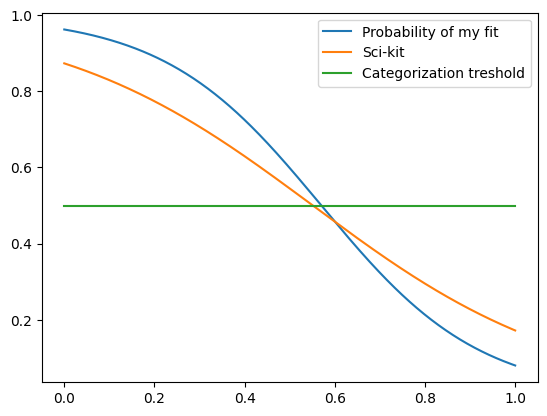

In [84]:
#Plot probabilities
x_lin = np.linspace(0,1,500).reshape(-1,1)
y_proba_me = logistic(betas,x_lin)

plt.plot(x_lin, y_proba_me)
plt.plot(x_lin, y_proba_sci[:, 1])
plt.plot(x_lin, np.array([0.5 for i in range(len(y_proba_sci[:,1]))]))
plt.legend(["Probability of my fit", "Sci-kit", "Categorization treshold"])

## Beyond linearity

Selecting two predictors in the dataset would require slight augmentation of our code. Let's start by investigating the data.

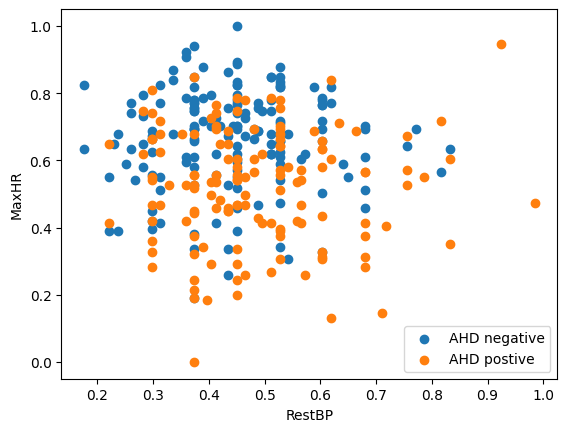

In [85]:
# Select multiple predictors from the dataframe
X_multi = df[['MaxHR', "RestBP"]]
X_multi = np_normalize(X_multi)
X_multi.insert(0, "ones", [1 for i in range(len(y))])

# Find AHD positive and negative cases for data visualization
AHD_positive = df.query('AHD == 1').index.to_list() 
AHD_negative = df.query('AHD == 0').index.to_list()

# Scatter plot
plt.scatter(X_multi[['RestBP']].iloc[AHD_negative], X_multi[['MaxHR']].iloc[AHD_negative])
plt.scatter(X_multi[['RestBP']].iloc[AHD_positive], X_multi[['MaxHR']].iloc[AHD_positive])
plt.xlabel("RestBP")
plt.ylabel("MaxHR")
plt.legend(['AHD negative', "AHD postive"])

Start by simplifying the codoe for logistic regression and test that it works beyond two parameters. 

**Note: ** the data need to be regularized to be used with the logistic regression. Otherwise, ``RestBP`` values are too large and the model will output ones...

In [86]:
def logistic_2(x):
    return 1 / (1+np.exp(-x))

init_guess = [1,1,1]
betas = init_guess

print(betas)
print(logistic_2(np.dot(X_multi, betas)))

[1, 1, 1]
[0.89733324 0.87673109 0.86018097 0.91180516 0.90215255 0.89942389
 0.90079657 0.88858179 0.8839659  0.89733324 0.8923049  0.89591818
 0.87999327 0.89591818 0.92169832 0.91600873 0.88474658 0.90079657
 0.87755371 0.90147664 0.86470863 0.9086872  0.88629426 0.90415555
 0.87169513 0.88474658 0.8952042  0.87339299 0.91422995 0.83561465
 0.8944859  0.8839659  0.89942389 0.89803437 0.90676914 0.9124171
 0.85171194 0.87169513 0.87339299 0.89156914 0.87339299 0.9124171
 0.91482663 0.90547044 0.90011233 0.8839659  0.84483555 0.88474658
 0.89873124 0.88782378 0.88079708 0.8699779  0.87423469 0.9124171
 0.88159623 0.84483555 0.90282433 0.87673109 0.8839659  0.86109654
 0.87999327 0.90215255 0.86911197 0.90415555 0.84483555 0.89156914
 0.89733324 0.91056968 0.90741248 0.89873124 0.90282433 0.8923049
 0.83030442 0.87673109 0.89156914 0.90805182 0.87507159 0.88782378
 0.90741248 0.87083895 0.86291259 0.88079708 0.91482663 0.91946607
 0.8952042  0.91362947 0.89662785 0.85458104 0.89942389 

At this point it remains to implement a gradient function that is capable of handling multidimensional input. To that end we can use function ``np.dot()``. The rest of the code remains pretty much the same 

In [87]:
# Gradient function of loss function for multiple predictors
def grad_loss_2(betas, X, y):
    N = len(y)
    y_np = np.array(y)
    p_hat = logistic_2(np.dot(X, betas))
    der_betas = -np.dot(y_np * (1 - p_hat) - (1 - y_np) * p_hat, X)

    return 1/N * der_betas

#Convert dataframe array and dataframe series to np arrays to optimize the code  
X_np = np.array(X_multi)
y_np = np.array(y)


# Gradient descent with same parameters as previously
## Note: It runs faster than original version, because numpy arrays are not converted in every iteration
for i in range(max_iter):
    betas = betas - gamma * grad_loss_2(betas, X_np, y_np)
print(betas)

[ 2.14720419 -5.70779563  2.38665206]


### Visualizing Baye's treshold

To visualize categorization boundary, it suffices to use log odds: 

$$
\ln \left(  \frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2
$$

If the Baye's trteshold is $0.5$, then we get

$$
X_1 = -\frac{1}{\beta_1} \left( \beta_0 + \beta_2 X_2 \right).
$$
In our case $X_1$ gives ``MaxHR`` and $X_2$ gives ``RestBP``. Hence, we can add a line to our scatter plot of data.

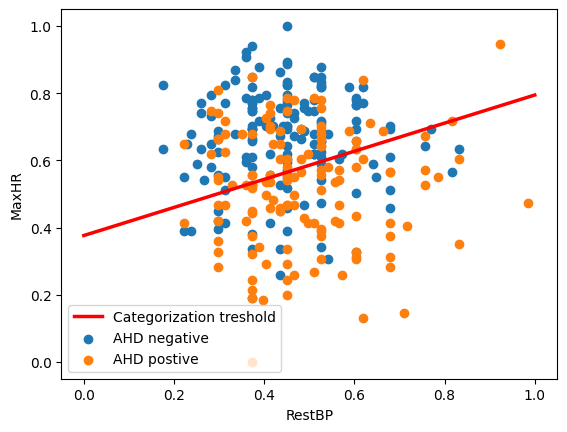

In [88]:
plt.plot(x_lin, -1/betas[1] * (betas[0] + betas[2] * x_lin), linewidth=2.5, color='red')
plt.scatter(X_multi[['RestBP']].iloc[AHD_negative], X_multi[['MaxHR']].iloc[AHD_negative])
plt.scatter(X_multi[['RestBP']].iloc[AHD_positive], X_multi[['MaxHR']].iloc[AHD_positive])
plt.xlabel("RestBP")
plt.ylabel("MaxHR")
plt.legend(['Categorization treshold','AHD negative', "AHD postive"])

### Interpretation

As probability of having the disease increases, log odds become greater than $0$

$$
\ln \left(  \frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0
$$

Hence, in our case, $\beta_1 < 0$, we obtain

$$
X_1 < \beta_0 + \beta_1 X_1 + \beta_2 X_2,
$$

and **positive cases are below the treshold line**. Therefore, negative cases will be above the categorization line. This principle can be extended to hyperplanes in higher dimensions.  

# Conclusion

In this lesson, I implemented my simple logistic regression model by using gradient descent and I compared it to the output of ``sci-kit`` package. Then I generalized my code for the case of multiple predictors.  